In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as pp

In [4]:
nrows = 100

In [5]:
!ls

accuracies.csv	ml-knn.ipynb	    ml-nene.ipynb   mnist_train.csv
lost+found	ml-nene-dumb.ipynb  mnist_test.csv


In [6]:
mnist_test = pd.read_csv('./mnist_test.csv', header=None)

In [7]:
mnist_train = pd.read_csv('./mnist_train.csv', header=None, nrows=nrows)

In [8]:
cnames = ["label"] + ['px_%s.%s' % (x,y) for x in range(28) for y in range(28)]

In [9]:
mnist_train.columns = cnames

In [10]:
mnist_test.columns = cnames

In [11]:
image_size = 28

In [12]:
label_train = mnist_train['label'].values

In [13]:
label_train.shape

(100,)

In [14]:
label_test = mnist_test['label'].values

In [15]:
label_test.shape

(10000,)

In [16]:
image_train = mnist_train.values[:, 1:]

In [17]:
image_train.shape

(100, 784)

In [18]:
image_test = mnist_test.values[:, 1:]

In [19]:
image_test.shape

(10000, 784)

In [20]:
image_train = image_train.reshape(nrows, 28, 28)

In [21]:
image_test = image_test.reshape(10000, 28, 28)

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [23]:
lines_train = image_train.reshape(nrows, 784)

In [24]:
lines_test = image_test.reshape(10000, 784)

In [25]:
from sklearn.neural_network import MLPClassifier

In [26]:
activations = [ 'identity', 'logistic', 'tanh', 'relu']

In [27]:
def hls_single(value):
    return (value,)

def hls_double(value):
    return (value, value)

def hls_triple(value):
    return (value, value, value)

def hls_bisect(value):
    return (value, value // 2, value // 4, value // 8)

def hls_stairs(value):
    return (value, 3 * value // 4, 2 * value // 4, 1 * value // 4)

In [28]:
hlss = {
    'single': hls_single,
    'double': hls_double,
    'triple': hls_triple,
    'bisect': hls_bisect,
    'stairs': hls_stairs,
}

In [29]:
def try_activations(ranges, hlsf):
    ranges = list(ranges)
    accuracies = np.zeros((len(ranges), len(activations)))
    
    for i, factor in enumerate(ranges):
        hls = hlsf(factor)
        
        for j, activation in enumerate(activations):
            print(f'run: {activation} @ {hls}')
            mlpc = MLPClassifier(activation=activation, random_state=0, hidden_layer_sizes=hls)
            %time mlpc = mlpc.fit(lines_train, label_train)

            pp.plot(range(mlpc.n_iter_), mlpc.loss_curve_)
            pp.show()
            print()

            preds_test = mlpc.predict(lines_test)

            accuracies[i, j] = accuracy_score(label_test, preds_test)
            print(accuracies[i, j])
            print()


        #print (f'hidden layer sizes: {hls}')
        #pp.bar(activations, accuracies[i, :])
        #pp.show()
        
    #print(f'per-activation effectiveness')

    #str_ranges = [str(factor) for factor in ranges]
    #for j, activation in enumerate(activations):
    #    print(f'activation: {activation}')
    #    pp.bar(str_ranges, accuracies[:, j])
    #    pp.show()
        
    return accuracies

In [30]:
factors = list(range(800, 0, -100))

run: identity @ (800,)
CPU times: user 885 ms, sys: 2.7 s, total: 3.59 s
Wall time: 478 ms


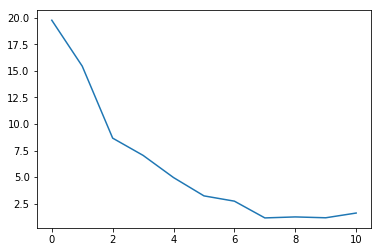


0.4939

run: logistic @ (800,)
CPU times: user 5.93 s, sys: 20.2 s, total: 26.1 s
Wall time: 3.3 s


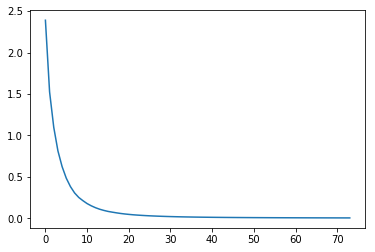


0.6883

run: tanh @ (800,)
CPU times: user 3.61 s, sys: 9.89 s, total: 13.5 s
Wall time: 1.4 s


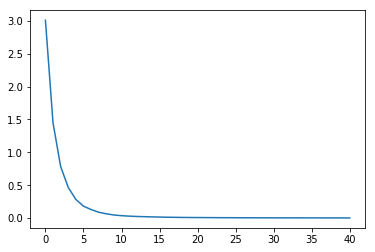


0.6547

run: relu @ (800,)
CPU times: user 986 ms, sys: 1.51 s, total: 2.5 s
Wall time: 332 ms


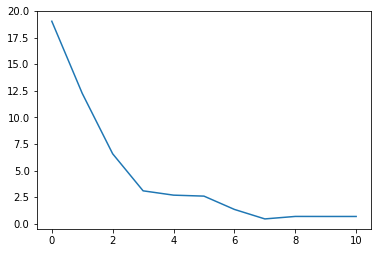


0.6073

run: identity @ (700,)
CPU times: user 1.33 s, sys: 2.96 s, total: 4.28 s
Wall time: 566 ms


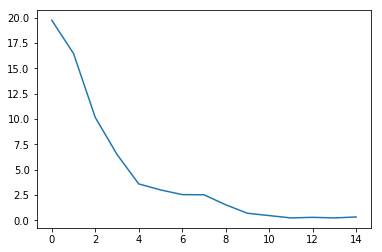


0.6064

run: logistic @ (700,)
CPU times: user 7.3 s, sys: 16.8 s, total: 24.1 s
Wall time: 3.02 s


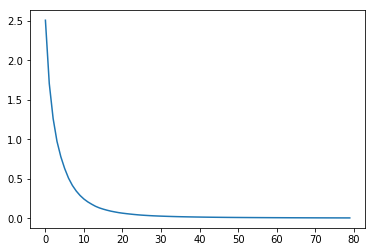


0.6882

run: tanh @ (700,)
CPU times: user 3.41 s, sys: 7.78 s, total: 11.2 s
Wall time: 1.41 s


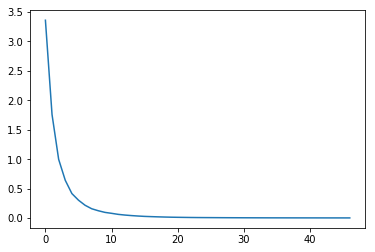


0.646

run: relu @ (700,)
CPU times: user 787 ms, sys: 1.92 s, total: 2.7 s
Wall time: 351 ms


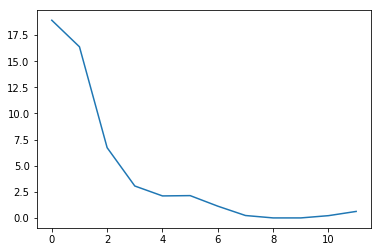


0.6221

run: identity @ (600,)
CPU times: user 830 ms, sys: 1.31 s, total: 2.14 s
Wall time: 251 ms


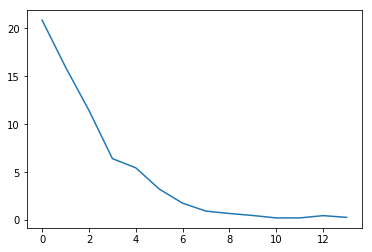


0.5889

run: logistic @ (600,)
CPU times: user 6.71 s, sys: 17.5 s, total: 24.2 s
Wall time: 3.04 s


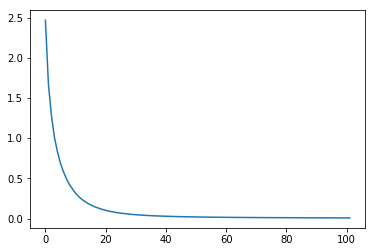


0.682

run: tanh @ (600,)
CPU times: user 3.44 s, sys: 8.2 s, total: 11.6 s
Wall time: 1.48 s


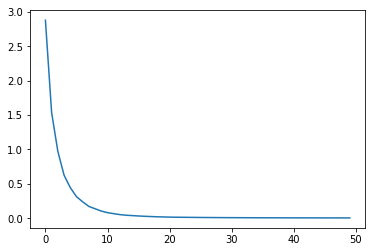


0.6539

run: relu @ (600,)
CPU times: user 846 ms, sys: 2.64 s, total: 3.49 s
Wall time: 439 ms


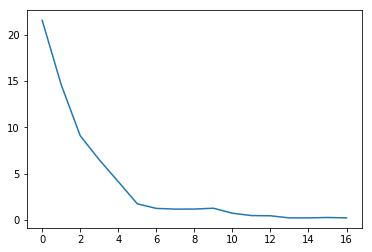


0.6097

run: identity @ (500,)
CPU times: user 580 ms, sys: 1.86 s, total: 2.44 s
Wall time: 330 ms


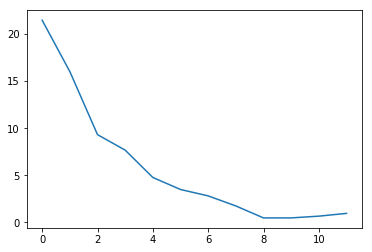


0.5944

run: logistic @ (500,)
CPU times: user 6.41 s, sys: 17.6 s, total: 24 s
Wall time: 2.82 s


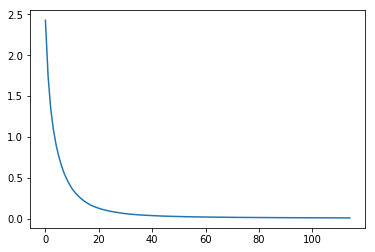


0.6733

run: tanh @ (500,)
CPU times: user 2.49 s, sys: 4.28 s, total: 6.77 s
Wall time: 840 ms


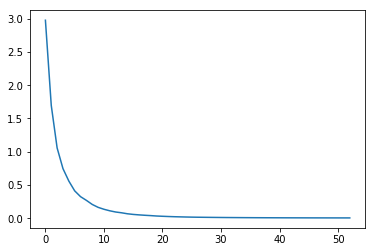


0.638

run: relu @ (500,)
CPU times: user 725 ms, sys: 2.72 s, total: 3.45 s
Wall time: 440 ms


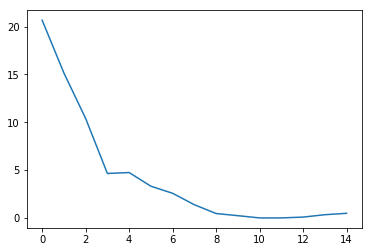


0.5994

run: identity @ (400,)
CPU times: user 619 ms, sys: 1.59 s, total: 2.21 s
Wall time: 289 ms


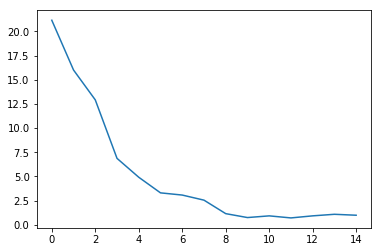


0.6065

run: logistic @ (400,)
CPU times: user 7.3 s, sys: 22.8 s, total: 30.1 s
Wall time: 3.76 s


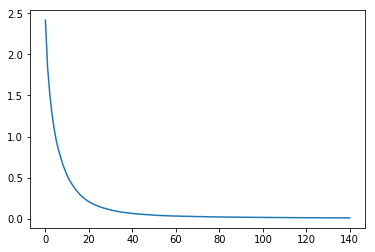


0.681

run: tanh @ (400,)
CPU times: user 3.01 s, sys: 6.58 s, total: 9.59 s
Wall time: 1.21 s


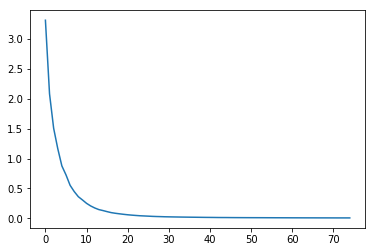


0.6551

run: relu @ (400,)
CPU times: user 614 ms, sys: 1.07 s, total: 1.68 s
Wall time: 223 ms


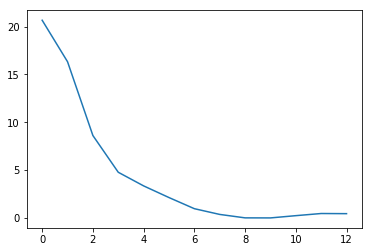


0.6143

run: identity @ (300,)
CPU times: user 594 ms, sys: 1.12 s, total: 1.71 s
Wall time: 229 ms


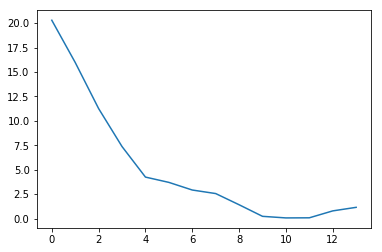


0.589

run: logistic @ (300,)
CPU times: user 7.38 s, sys: 18.6 s, total: 26 s
Wall time: 3.27 s


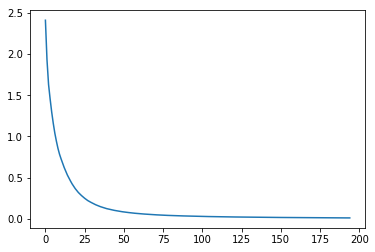


0.6735

run: tanh @ (300,)
CPU times: user 4.71 s, sys: 12.1 s, total: 16.8 s
Wall time: 1.86 s


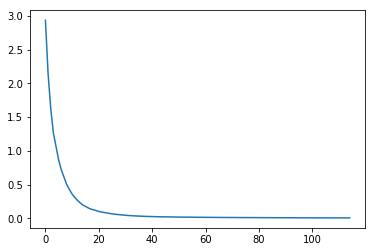


0.6301

run: relu @ (300,)
CPU times: user 431 ms, sys: 807 ms, total: 1.24 s
Wall time: 162 ms


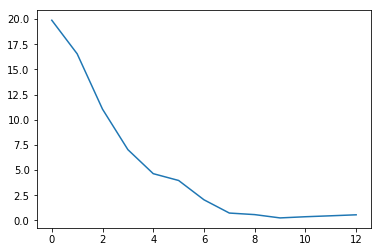


0.6059

run: identity @ (200,)
CPU times: user 415 ms, sys: 674 ms, total: 1.09 s
Wall time: 138 ms


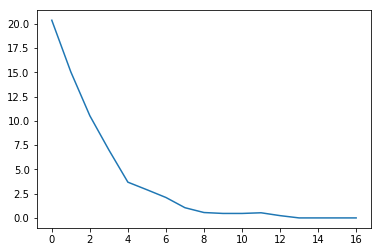


0.5907

run: logistic @ (200,)


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


CPU times: user 5.58 s, sys: 16.9 s, total: 22.5 s
Wall time: 2.82 s


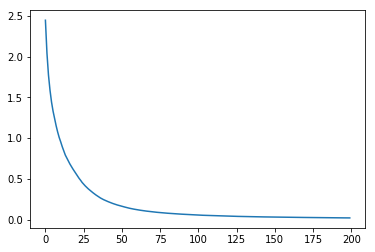


0.6717

run: tanh @ (200,)
CPU times: user 2.83 s, sys: 7.3 s, total: 10.1 s
Wall time: 1.28 s


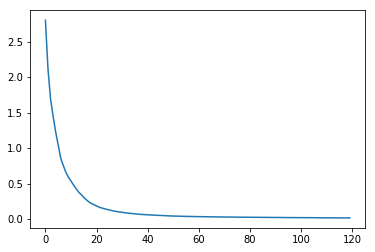


0.6115

run: relu @ (200,)
CPU times: user 423 ms, sys: 1.59 s, total: 2.01 s
Wall time: 251 ms


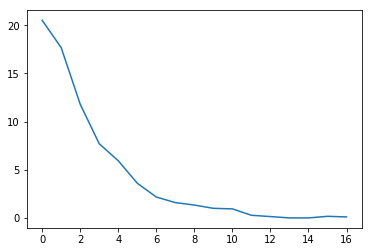


0.6052

run: identity @ (100,)
CPU times: user 377 ms, sys: 1.06 s, total: 1.44 s
Wall time: 182 ms


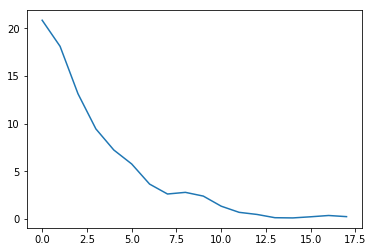


0.5919

run: logistic @ (100,)
CPU times: user 3.87 s, sys: 11 s, total: 14.8 s
Wall time: 1.55 s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


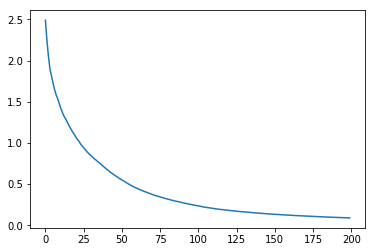


0.6617

run: tanh @ (100,)


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


CPU times: user 3.94 s, sys: 9.69 s, total: 13.6 s
Wall time: 1.73 s


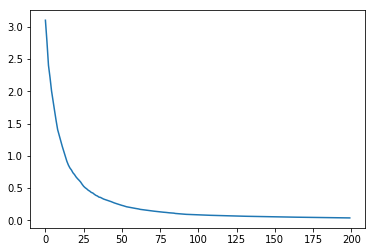


0.6014

run: relu @ (100,)
CPU times: user 220 ms, sys: 656 ms, total: 876 ms
Wall time: 116 ms


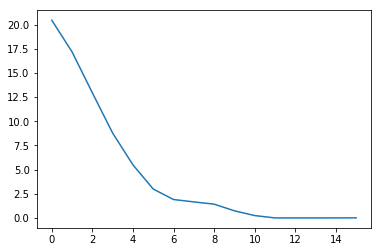


0.5471

run: identity @ (800, 800)
CPU times: user 4.46 s, sys: 8.51 s, total: 13 s
Wall time: 1.68 s


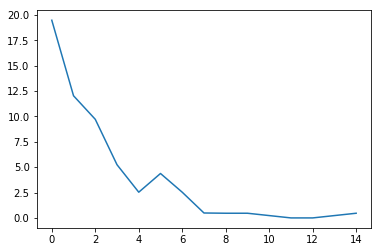


0.6245

run: logistic @ (800, 800)
CPU times: user 13.7 s, sys: 34.7 s, total: 48.4 s
Wall time: 5.84 s


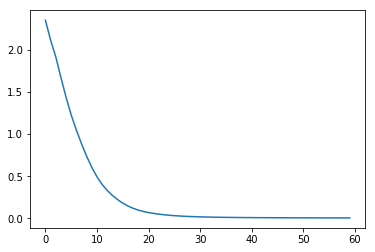


0.6862

run: tanh @ (800, 800)
CPU times: user 6.21 s, sys: 16.3 s, total: 22.5 s
Wall time: 2.83 s


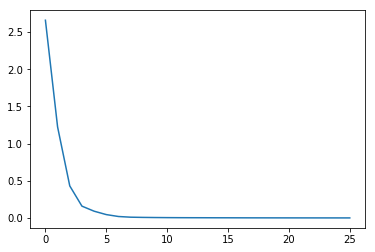


0.67

run: relu @ (800, 800)
CPU times: user 3 s, sys: 7.64 s, total: 10.6 s
Wall time: 1.39 s


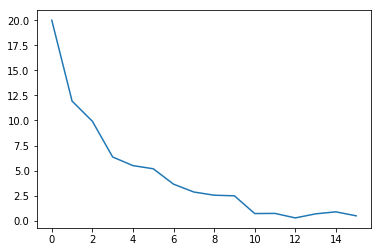


0.5324

run: identity @ (700, 700)
CPU times: user 2.69 s, sys: 3.65 s, total: 6.35 s
Wall time: 671 ms


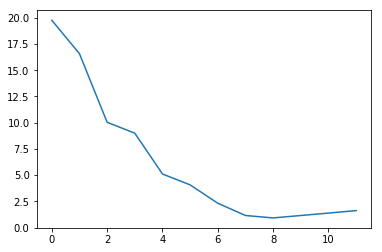


0.545

run: logistic @ (700, 700)
CPU times: user 12.8 s, sys: 31.6 s, total: 44.4 s
Wall time: 5.55 s


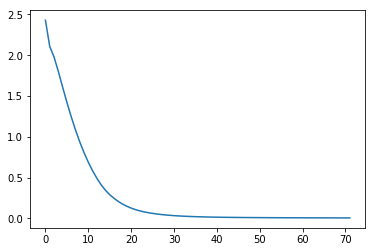


0.6874

run: tanh @ (700, 700)
CPU times: user 3.02 s, sys: 6.75 s, total: 9.77 s
Wall time: 1.25 s


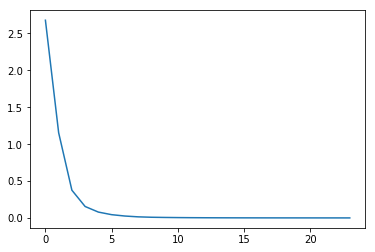


0.6769

run: relu @ (700, 700)
CPU times: user 2.98 s, sys: 6.59 s, total: 9.58 s
Wall time: 1.23 s


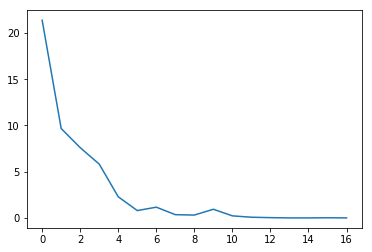


0.5782

run: identity @ (600, 600)
CPU times: user 2.53 s, sys: 5.46 s, total: 7.99 s
Wall time: 1.01 s


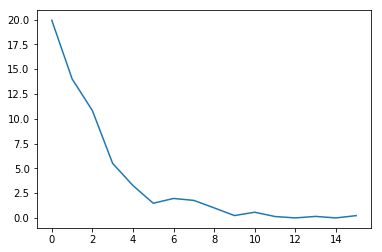


0.6134

run: logistic @ (600, 600)
CPU times: user 12.9 s, sys: 25.7 s, total: 38.6 s
Wall time: 4.84 s


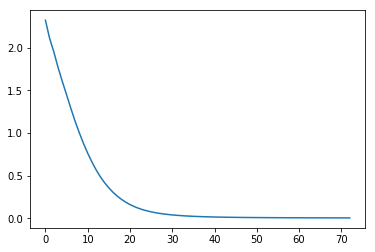


0.6851

run: tanh @ (600, 600)
CPU times: user 3.31 s, sys: 5.83 s, total: 9.14 s
Wall time: 1.16 s


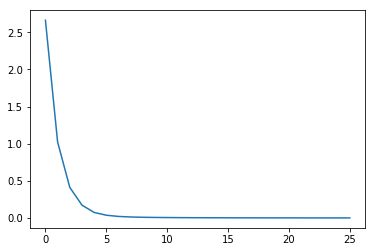


0.6771

run: relu @ (600, 600)
CPU times: user 1.52 s, sys: 4.09 s, total: 5.62 s
Wall time: 717 ms


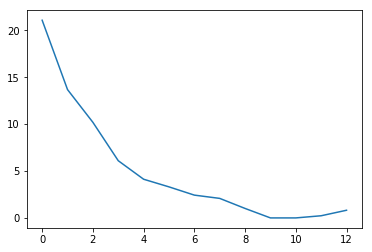


0.5005

run: identity @ (500, 500)
CPU times: user 1.81 s, sys: 4.02 s, total: 5.83 s
Wall time: 763 ms


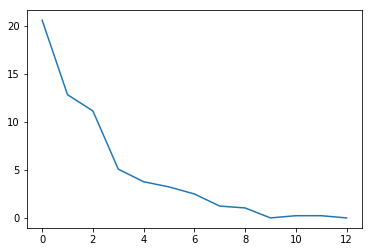


0.5779

run: logistic @ (500, 500)
CPU times: user 11.1 s, sys: 25.8 s, total: 36.9 s
Wall time: 4.58 s


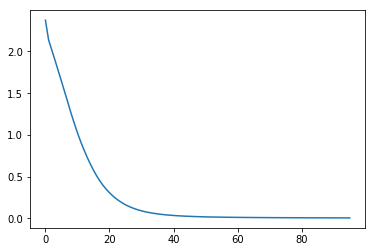


0.6783

run: tanh @ (500, 500)
CPU times: user 2.71 s, sys: 5.54 s, total: 8.25 s
Wall time: 1.07 s


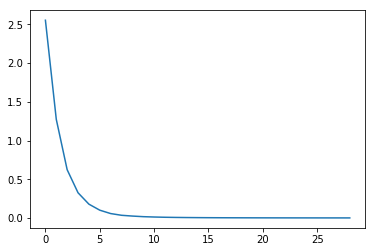


0.6665

run: relu @ (500, 500)
CPU times: user 1.23 s, sys: 2.67 s, total: 3.91 s
Wall time: 536 ms


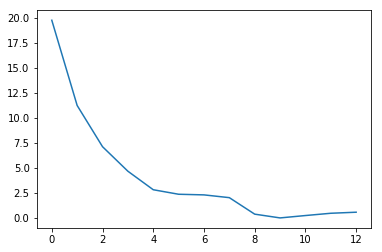


0.5897

run: identity @ (400, 400)
CPU times: user 888 ms, sys: 1.58 s, total: 2.47 s
Wall time: 337 ms


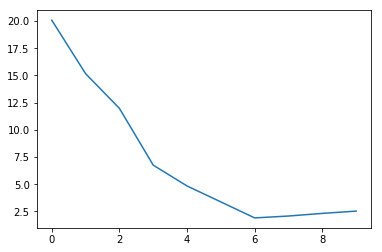


0.5996

run: logistic @ (400, 400)
CPU times: user 10.9 s, sys: 31.5 s, total: 42.4 s
Wall time: 4.99 s


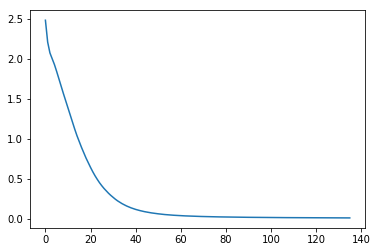


0.6872

run: tanh @ (400, 400)
CPU times: user 2.09 s, sys: 4.59 s, total: 6.68 s
Wall time: 861 ms


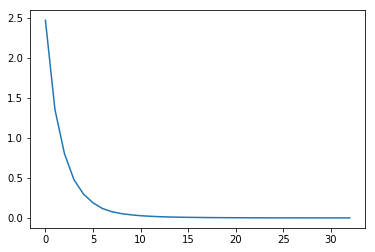


0.6773

run: relu @ (400, 400)
CPU times: user 1.08 s, sys: 2.47 s, total: 3.55 s
Wall time: 449 ms


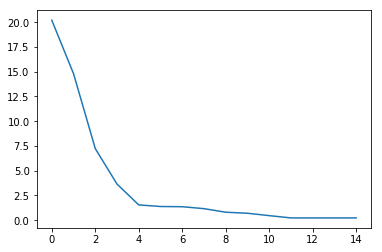


0.5818

run: identity @ (300, 300)
CPU times: user 1.05 s, sys: 3.19 s, total: 4.24 s
Wall time: 552 ms


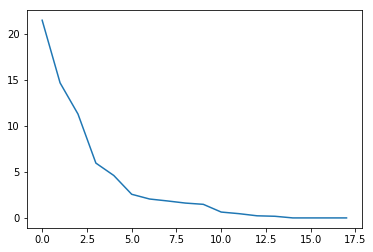


0.6091

run: logistic @ (300, 300)
CPU times: user 11.8 s, sys: 30.4 s, total: 42.3 s
Wall time: 4.9 s


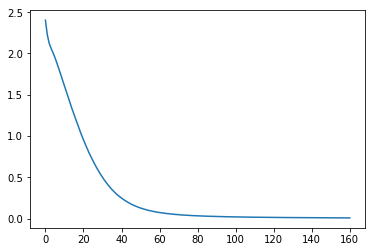


0.6786

run: tanh @ (300, 300)
CPU times: user 2.77 s, sys: 9.7 s, total: 12.5 s
Wall time: 1.63 s


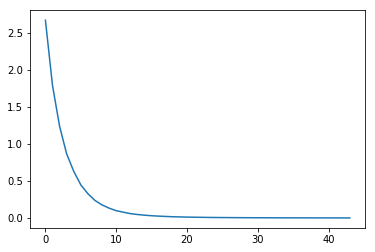


0.6489

run: relu @ (300, 300)
CPU times: user 966 ms, sys: 3.49 s, total: 4.46 s
Wall time: 617 ms


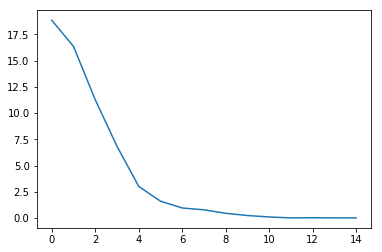


0.5713

run: identity @ (200, 200)
CPU times: user 748 ms, sys: 2.44 s, total: 3.18 s
Wall time: 412 ms


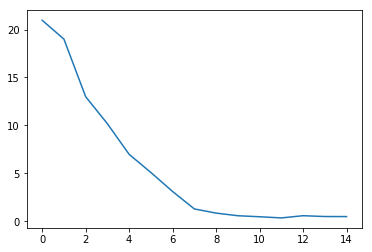


0.6077

run: logistic @ (200, 200)
CPU times: user 9.01 s, sys: 27 s, total: 36 s
Wall time: 4.35 s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


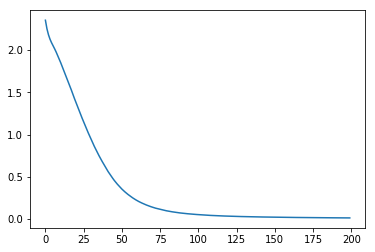


0.6703

run: tanh @ (200, 200)
CPU times: user 2.62 s, sys: 8.02 s, total: 10.6 s
Wall time: 1.37 s


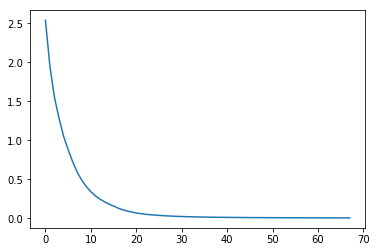


0.6308

run: relu @ (200, 200)
CPU times: user 661 ms, sys: 2.16 s, total: 2.82 s
Wall time: 356 ms


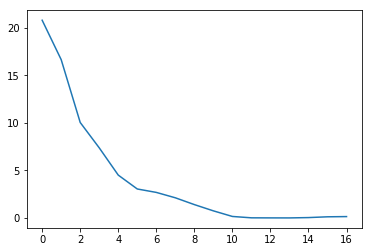


0.5506

run: identity @ (100, 100)
CPU times: user 415 ms, sys: 1.33 s, total: 1.74 s
Wall time: 219 ms


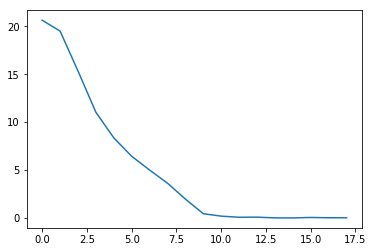


0.5908

run: logistic @ (100, 100)


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


CPU times: user 5.21 s, sys: 18.2 s, total: 23.5 s
Wall time: 2.94 s


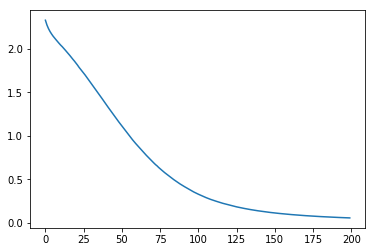


0.6793

run: tanh @ (100, 100)
CPU times: user 4.55 s, sys: 14.7 s, total: 19.3 s
Wall time: 2.08 s


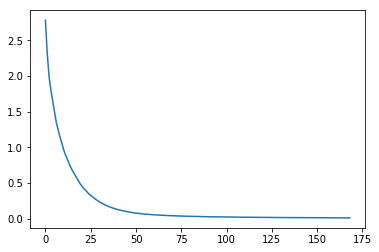


0.6084

run: relu @ (100, 100)
CPU times: user 535 ms, sys: 1.62 s, total: 2.15 s
Wall time: 283 ms


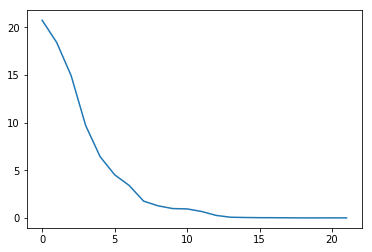


0.5028

run: identity @ (800, 800, 800)
CPU times: user 5.95 s, sys: 10.4 s, total: 16.3 s
Wall time: 2.09 s


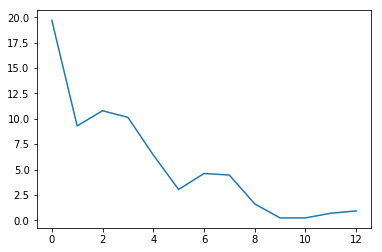


0.6321

run: logistic @ (800, 800, 800)
CPU times: user 22.6 s, sys: 57.7 s, total: 1min 20s
Wall time: 9.63 s


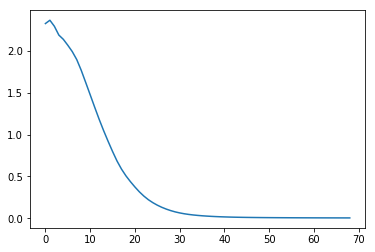


0.6643

run: tanh @ (800, 800, 800)
CPU times: user 5.37 s, sys: 9.98 s, total: 15.4 s
Wall time: 1.95 s


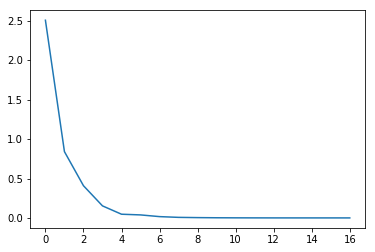


0.6325

run: relu @ (800, 800, 800)
CPU times: user 4.43 s, sys: 10.2 s, total: 14.6 s
Wall time: 1.69 s


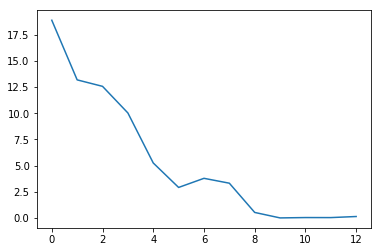


0.5287

run: identity @ (700, 700, 700)
CPU times: user 4.61 s, sys: 8.3 s, total: 12.9 s
Wall time: 1.66 s


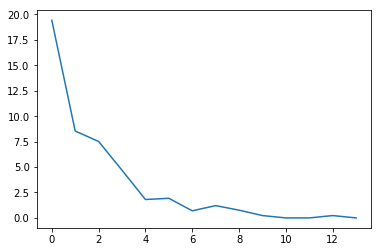


0.5891

run: logistic @ (700, 700, 700)
CPU times: user 21.8 s, sys: 53.8 s, total: 1min 15s
Wall time: 9.2 s


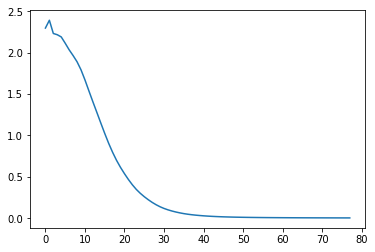


0.6655

run: tanh @ (700, 700, 700)
CPU times: user 4.87 s, sys: 10.9 s, total: 15.8 s
Wall time: 1.99 s


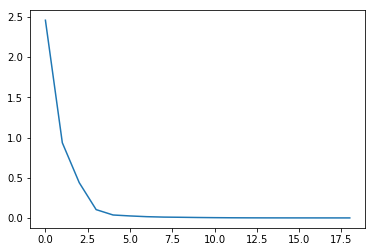


0.67

run: relu @ (700, 700, 700)
CPU times: user 4.17 s, sys: 8.65 s, total: 12.8 s
Wall time: 1.64 s


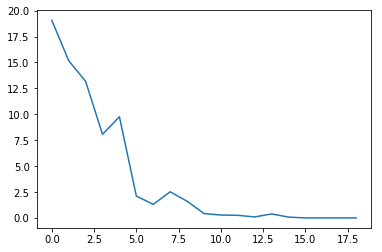


0.6048

run: identity @ (600, 600, 600)
CPU times: user 4.51 s, sys: 8.2 s, total: 12.7 s
Wall time: 1.63 s


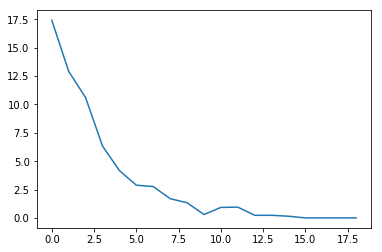


0.6092

run: logistic @ (600, 600, 600)
CPU times: user 18 s, sys: 49.1 s, total: 1min 7s
Wall time: 8.16 s


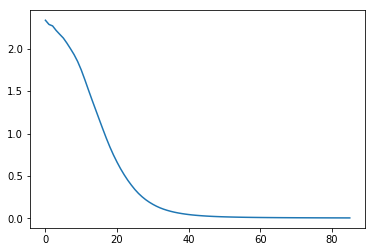


0.6665

run: tanh @ (600, 600, 600)
CPU times: user 4.64 s, sys: 10.1 s, total: 14.7 s
Wall time: 1.89 s


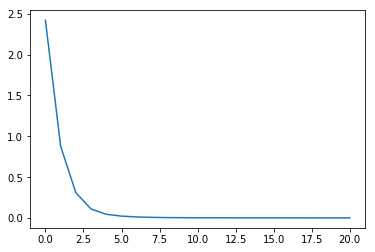


0.6587

run: relu @ (600, 600, 600)
CPU times: user 2.8 s, sys: 8.87 s, total: 11.7 s
Wall time: 1.46 s


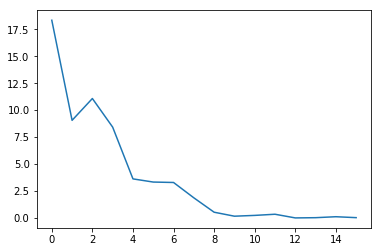


0.6413

run: identity @ (500, 500, 500)
CPU times: user 1.8 s, sys: 2.81 s, total: 4.61 s
Wall time: 599 ms


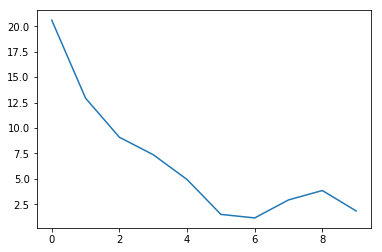


0.5936

run: logistic @ (500, 500, 500)
CPU times: user 14.7 s, sys: 35.6 s, total: 50.3 s
Wall time: 6.3 s


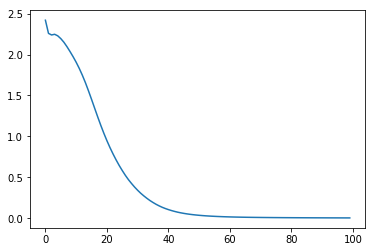


0.6779

run: tanh @ (500, 500, 500)
CPU times: user 3.37 s, sys: 10 s, total: 13.4 s
Wall time: 1.67 s


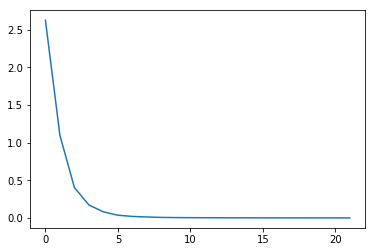


0.6818

run: relu @ (500, 500, 500)
CPU times: user 1.49 s, sys: 4 s, total: 5.49 s
Wall time: 689 ms


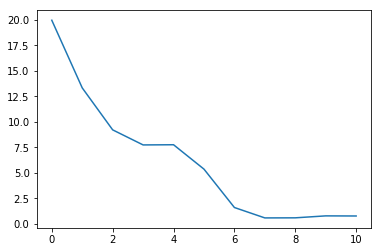


0.5218

run: identity @ (400, 400, 400)
CPU times: user 2.29 s, sys: 3.19 s, total: 5.48 s
Wall time: 689 ms


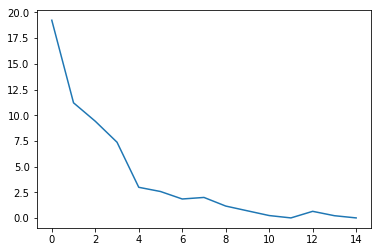


0.6332

run: logistic @ (400, 400, 400)
CPU times: user 13.8 s, sys: 32.2 s, total: 46 s
Wall time: 5.75 s


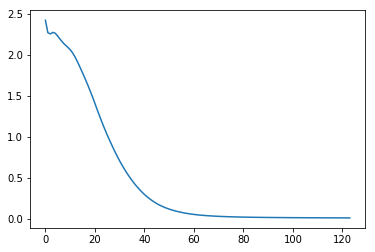


0.6715

run: tanh @ (400, 400, 400)
CPU times: user 3.51 s, sys: 7.15 s, total: 10.7 s
Wall time: 1.13 s


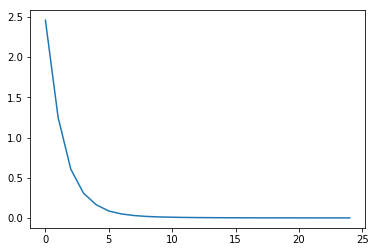


0.6616

run: relu @ (400, 400, 400)
CPU times: user 1.65 s, sys: 2.36 s, total: 4.01 s
Wall time: 512 ms


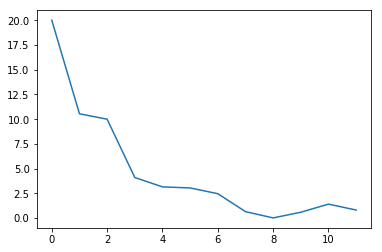


0.5699

run: identity @ (300, 300, 300)
CPU times: user 896 ms, sys: 1.47 s, total: 2.37 s
Wall time: 298 ms


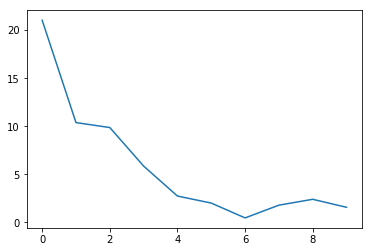


0.5919

run: logistic @ (300, 300, 300)
CPU times: user 12 s, sys: 27 s, total: 39 s
Wall time: 4.88 s


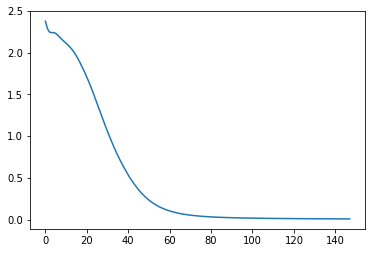


0.6563

run: tanh @ (300, 300, 300)
CPU times: user 2.39 s, sys: 6.08 s, total: 8.47 s
Wall time: 1.06 s


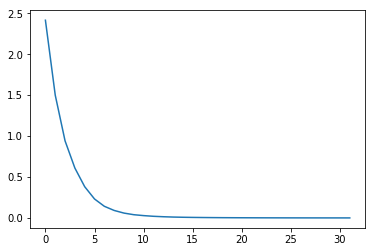


0.6553

run: relu @ (300, 300, 300)
CPU times: user 988 ms, sys: 2.56 s, total: 3.55 s
Wall time: 460 ms


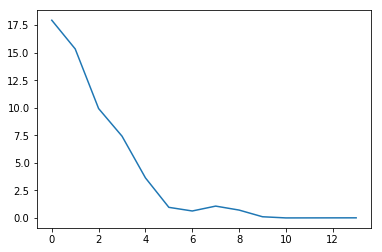


0.5234

run: identity @ (200, 200, 200)
CPU times: user 841 ms, sys: 2.51 s, total: 3.35 s
Wall time: 418 ms


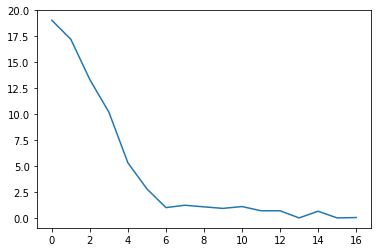


0.6335

run: logistic @ (200, 200, 200)


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


CPU times: user 10.9 s, sys: 37.1 s, total: 48.1 s
Wall time: 6.01 s


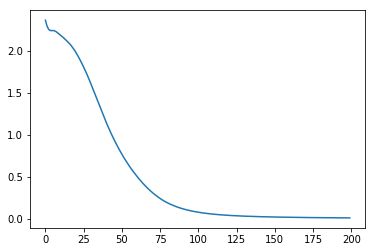


0.6604

run: tanh @ (200, 200, 200)
CPU times: user 2.18 s, sys: 7.57 s, total: 9.74 s
Wall time: 1.23 s


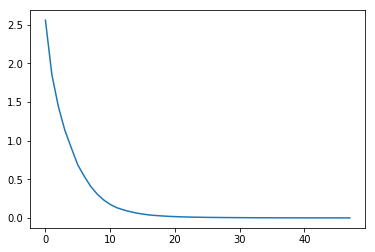


0.6597

run: relu @ (200, 200, 200)
CPU times: user 807 ms, sys: 1.37 s, total: 2.18 s
Wall time: 272 ms


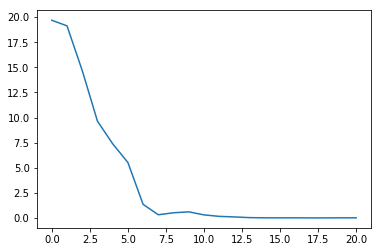


0.5499

run: identity @ (100, 100, 100)
CPU times: user 235 ms, sys: 754 ms, total: 989 ms
Wall time: 126 ms


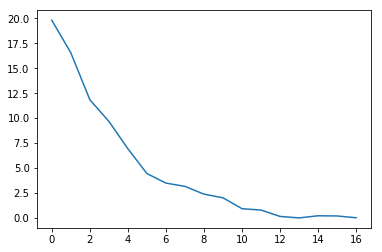


0.5276

run: logistic @ (100, 100, 100)


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


CPU times: user 5.95 s, sys: 15.5 s, total: 21.5 s
Wall time: 2.75 s


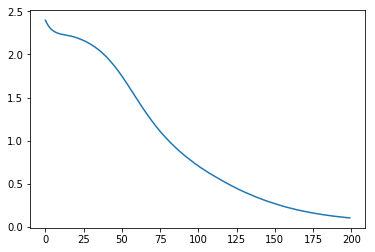


0.5763

run: tanh @ (100, 100, 100)
CPU times: user 3.76 s, sys: 12.2 s, total: 15.9 s
Wall time: 1.99 s


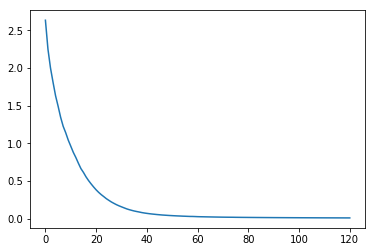


0.5762

run: relu @ (100, 100, 100)
CPU times: user 528 ms, sys: 1.31 s, total: 1.84 s
Wall time: 121 ms


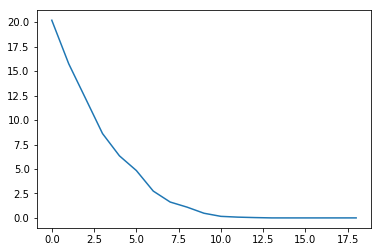


0.4545

run: identity @ (800, 400, 200, 100)
CPU times: user 2.97 s, sys: 4.37 s, total: 7.34 s
Wall time: 913 ms


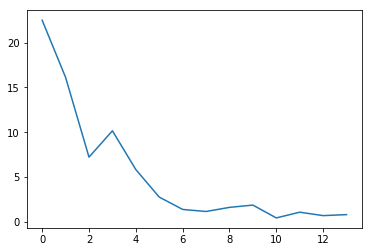


0.572

run: logistic @ (800, 400, 200, 100)


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


CPU times: user 37.7 s, sys: 1min 43s, total: 2min 20s
Wall time: 17.4 s


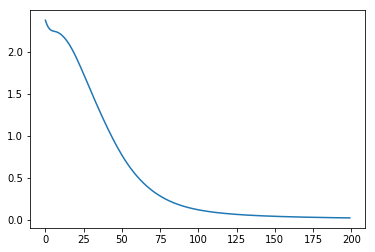


0.6539

run: tanh @ (800, 400, 200, 100)
CPU times: user 6.91 s, sys: 18 s, total: 24.9 s
Wall time: 2.53 s


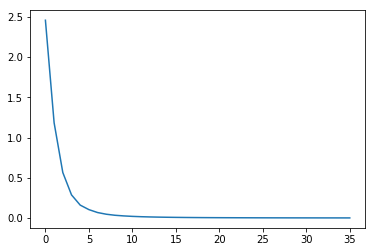


0.6703

run: relu @ (800, 400, 200, 100)
CPU times: user 3.11 s, sys: 7.57 s, total: 10.7 s
Wall time: 1.34 s


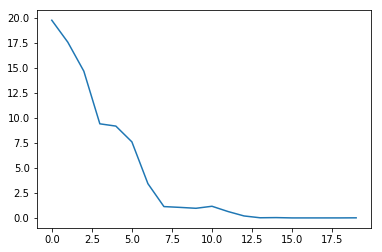


0.5777

run: identity @ (700, 350, 175, 87)
CPU times: user 2.2 s, sys: 4.21 s, total: 6.42 s
Wall time: 801 ms


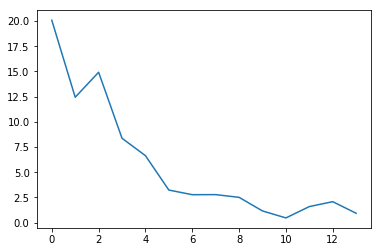


0.5801

run: logistic @ (700, 350, 175, 87)
CPU times: user 29.5 s, sys: 1min 12s, total: 1min 42s
Wall time: 12.6 s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


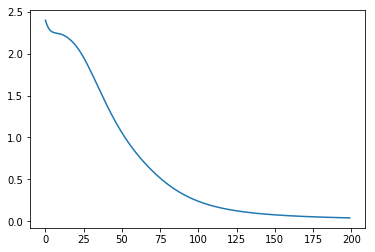


0.6198

run: tanh @ (700, 350, 175, 87)
CPU times: user 6.54 s, sys: 19 s, total: 25.5 s
Wall time: 3.25 s


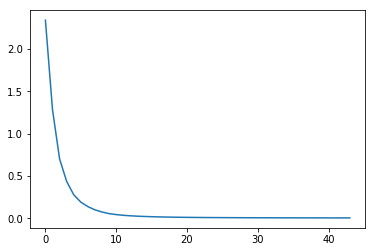


0.6594

run: relu @ (700, 350, 175, 87)
CPU times: user 2.66 s, sys: 6.59 s, total: 9.25 s
Wall time: 1.12 s


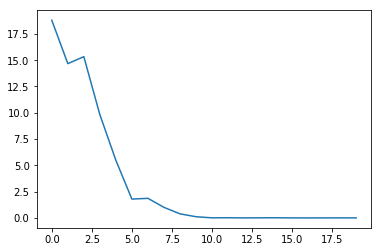


0.5281

run: identity @ (600, 300, 150, 75)
CPU times: user 2.09 s, sys: 4.34 s, total: 6.42 s
Wall time: 855 ms


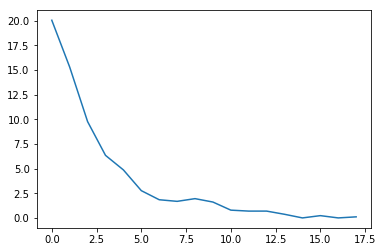


0.5894

run: logistic @ (600, 300, 150, 75)
CPU times: user 23.5 s, sys: 1min 3s, total: 1min 27s
Wall time: 11 s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


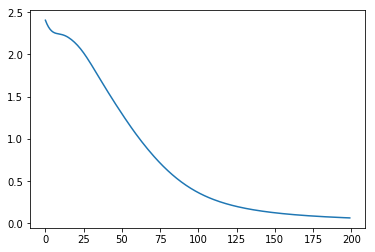


0.6092

run: tanh @ (600, 300, 150, 75)
CPU times: user 5.69 s, sys: 13.6 s, total: 19.3 s
Wall time: 2.44 s


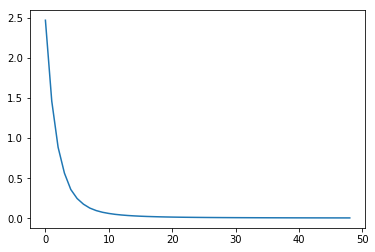


0.6581

run: relu @ (600, 300, 150, 75)
CPU times: user 1.8 s, sys: 4.94 s, total: 6.73 s
Wall time: 847 ms


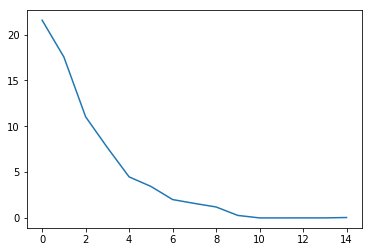


0.546

run: identity @ (500, 250, 125, 62)
CPU times: user 1.46 s, sys: 4.84 s, total: 6.3 s
Wall time: 794 ms


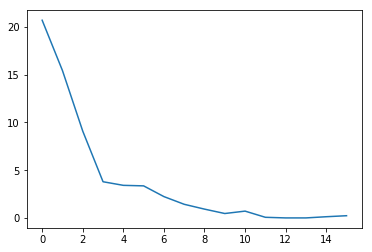


0.5918

run: logistic @ (500, 250, 125, 62)
CPU times: user 20.4 s, sys: 50.4 s, total: 1min 10s
Wall time: 8.59 s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


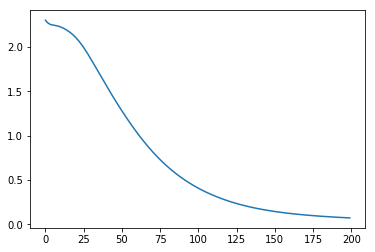


0.6159

run: tanh @ (500, 250, 125, 62)
CPU times: user 5.62 s, sys: 14.2 s, total: 19.8 s
Wall time: 2.52 s


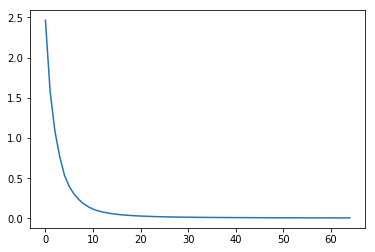


0.6456

run: relu @ (500, 250, 125, 62)
CPU times: user 1.43 s, sys: 2.88 s, total: 4.31 s
Wall time: 589 ms


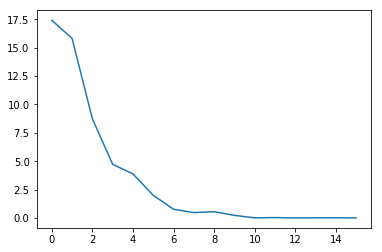


0.5186

run: identity @ (400, 200, 100, 50)
CPU times: user 1.04 s, sys: 2.3 s, total: 3.35 s
Wall time: 436 ms


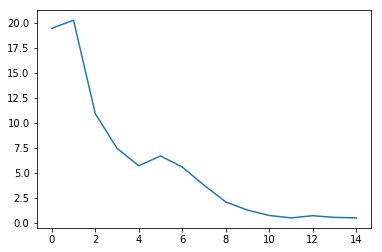


0.581

run: logistic @ (400, 200, 100, 50)


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


CPU times: user 15 s, sys: 40.7 s, total: 55.7 s
Wall time: 6.74 s


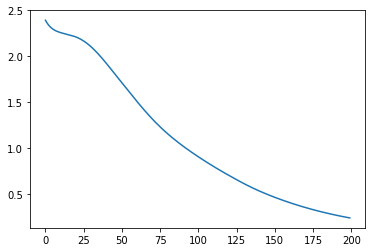


0.6269

run: tanh @ (400, 200, 100, 50)
CPU times: user 6.1 s, sys: 14.8 s, total: 20.9 s
Wall time: 2.61 s


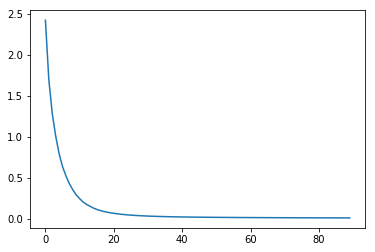


0.641

run: relu @ (400, 200, 100, 50)
CPU times: user 1.47 s, sys: 3.4 s, total: 4.87 s
Wall time: 613 ms


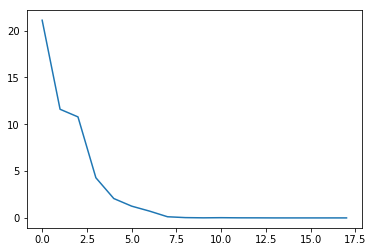


0.514

run: identity @ (300, 150, 75, 37)
CPU times: user 723 ms, sys: 1.53 s, total: 2.26 s
Wall time: 283 ms


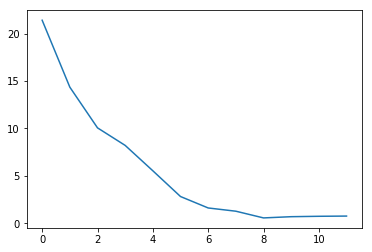


0.5735

run: logistic @ (300, 150, 75, 37)


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


CPU times: user 11.6 s, sys: 32.7 s, total: 44.3 s
Wall time: 5.15 s


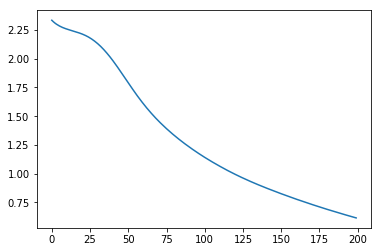


0.4966

run: tanh @ (300, 150, 75, 37)
CPU times: user 7.46 s, sys: 18.8 s, total: 26.2 s
Wall time: 3.3 s


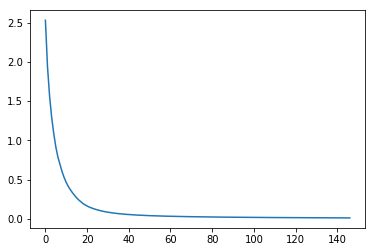


0.6305

run: relu @ (300, 150, 75, 37)
CPU times: user 1.37 s, sys: 3.03 s, total: 4.41 s
Wall time: 558 ms


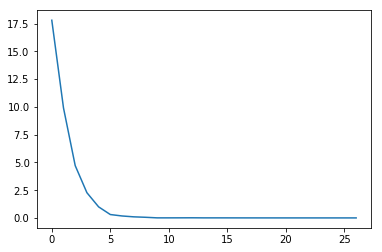


0.5354

run: identity @ (200, 100, 50, 25)
CPU times: user 847 ms, sys: 1.49 s, total: 2.33 s
Wall time: 294 ms


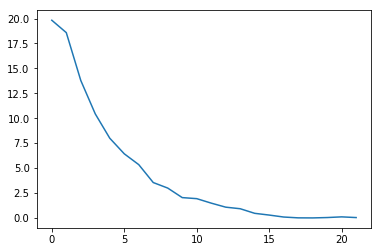


0.5929

run: logistic @ (200, 100, 50, 25)


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


CPU times: user 7.39 s, sys: 17.2 s, total: 24.6 s
Wall time: 3.08 s


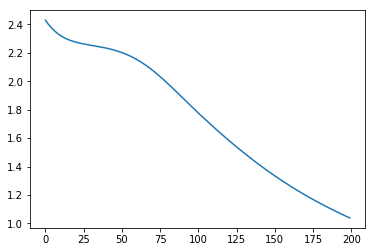


0.4678

run: tanh @ (200, 100, 50, 25)


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


CPU times: user 6.33 s, sys: 17.6 s, total: 23.9 s
Wall time: 2.82 s


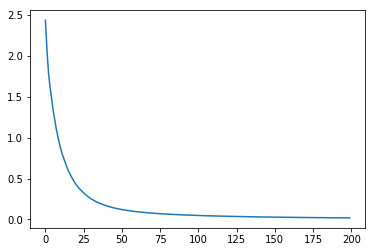


0.6191

run: relu @ (200, 100, 50, 25)
CPU times: user 905 ms, sys: 4.25 s, total: 5.16 s
Wall time: 688 ms


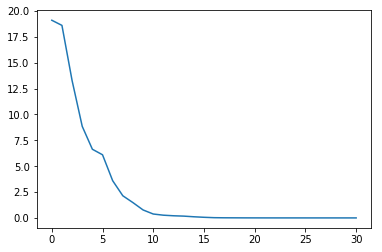


0.4421

run: identity @ (100, 50, 25, 12)
CPU times: user 402 ms, sys: 1.06 s, total: 1.47 s
Wall time: 189 ms


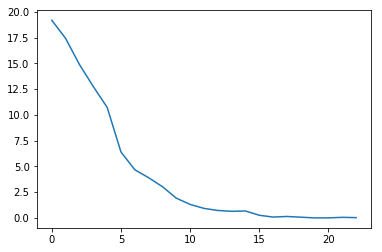


0.5746

run: logistic @ (100, 50, 25, 12)


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


CPU times: user 3.97 s, sys: 11 s, total: 15 s
Wall time: 1.96 s


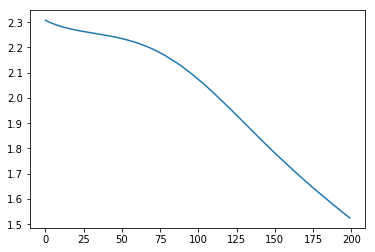


0.4438

run: tanh @ (100, 50, 25, 12)


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


CPU times: user 4.65 s, sys: 15.8 s, total: 20.4 s
Wall time: 2.57 s


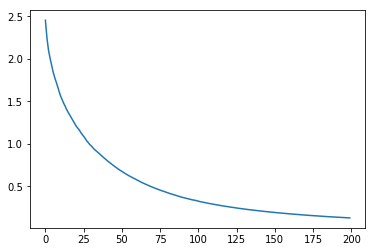


0.5872

run: relu @ (100, 50, 25, 12)
CPU times: user 1.99 s, sys: 4.98 s, total: 6.96 s
Wall time: 912 ms


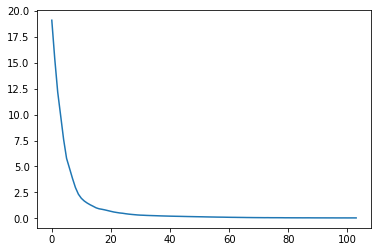


0.417

run: identity @ (800, 600, 400, 200)
CPU times: user 2.26 s, sys: 5.23 s, total: 7.5 s
Wall time: 1.03 s


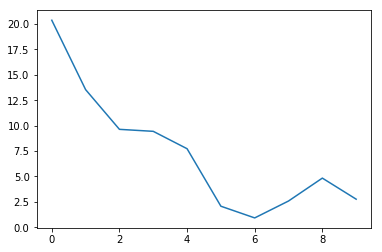


0.5822

run: logistic @ (800, 600, 400, 200)
CPU times: user 39.7 s, sys: 1min 35s, total: 2min 14s
Wall time: 16.7 s


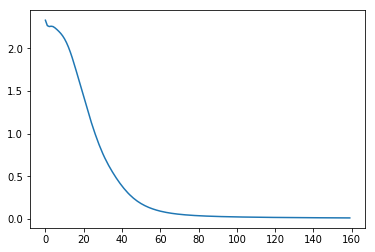


0.653

run: tanh @ (800, 600, 400, 200)
CPU times: user 7.08 s, sys: 16.9 s, total: 23.9 s
Wall time: 3.04 s


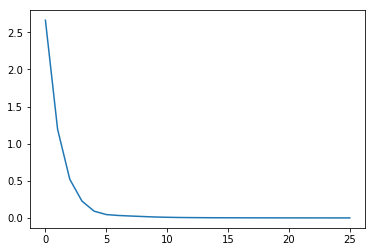


0.685

run: relu @ (800, 600, 400, 200)
CPU times: user 5.12 s, sys: 13.5 s, total: 18.6 s
Wall time: 2.36 s


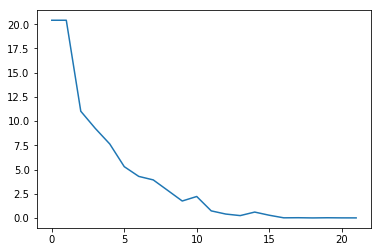


0.5391

run: identity @ (700, 525, 350, 175)
CPU times: user 4.77 s, sys: 6.74 s, total: 11.5 s
Wall time: 1.42 s


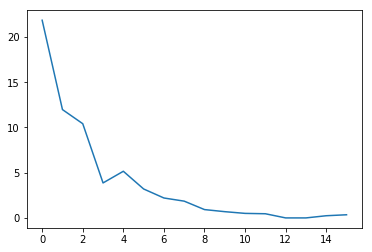


0.603

run: logistic @ (700, 525, 350, 175)
CPU times: user 1.53 s, sys: 4.5 s, total: 6.03 s
Wall time: 765 ms


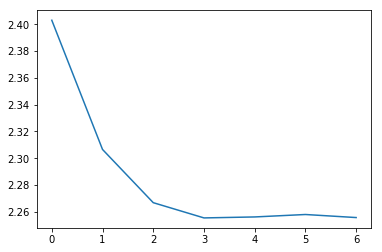


0.2865

run: tanh @ (700, 525, 350, 175)
CPU times: user 6.22 s, sys: 17.2 s, total: 23.4 s
Wall time: 2.98 s


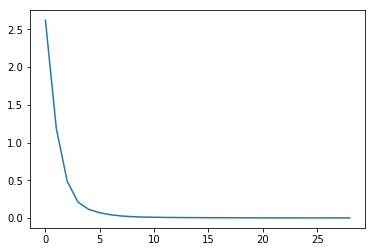


0.6584

run: relu @ (700, 525, 350, 175)
CPU times: user 4.59 s, sys: 11.3 s, total: 15.9 s
Wall time: 2.01 s


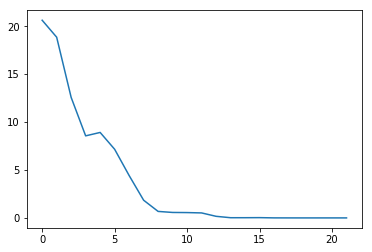


0.5712

run: identity @ (600, 450, 300, 150)
CPU times: user 1.67 s, sys: 3.47 s, total: 5.14 s
Wall time: 569 ms


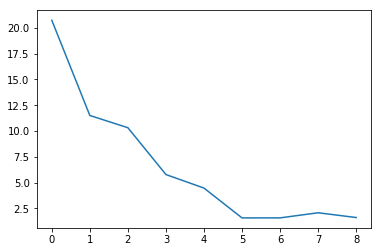


0.5978

run: logistic @ (600, 450, 300, 150)


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


CPU times: user 31.6 s, sys: 1min 18s, total: 1min 50s
Wall time: 13.6 s


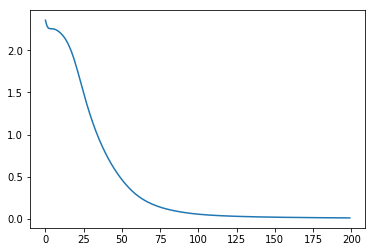


0.6485

run: tanh @ (600, 450, 300, 150)
CPU times: user 4.88 s, sys: 14.5 s, total: 19.4 s
Wall time: 2.45 s


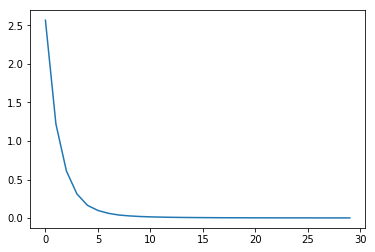


0.648

run: relu @ (600, 450, 300, 150)
CPU times: user 2.23 s, sys: 6.13 s, total: 8.36 s
Wall time: 1.05 s


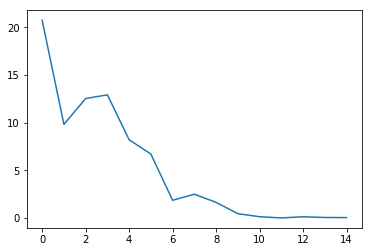


0.5774

run: identity @ (500, 375, 250, 125)
CPU times: user 1.42 s, sys: 3.76 s, total: 5.18 s
Wall time: 647 ms


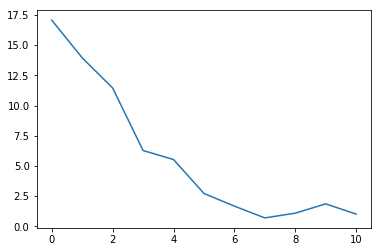


0.531

run: logistic @ (500, 375, 250, 125)
CPU times: user 1.11 s, sys: 3.78 s, total: 4.89 s
Wall time: 634 ms


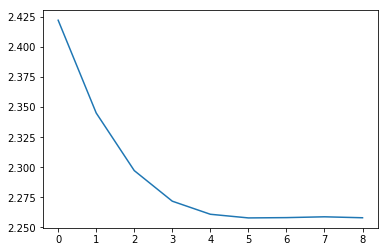


0.098

run: tanh @ (500, 375, 250, 125)
CPU times: user 4.52 s, sys: 12.3 s, total: 16.8 s
Wall time: 1.79 s


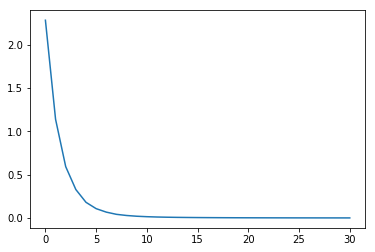


0.6499

run: relu @ (500, 375, 250, 125)
CPU times: user 2.53 s, sys: 6.75 s, total: 9.28 s
Wall time: 1.31 s


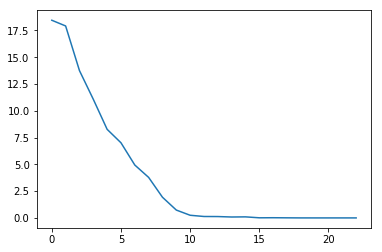


0.529

run: identity @ (400, 300, 200, 100)
CPU times: user 1.68 s, sys: 3.16 s, total: 4.84 s
Wall time: 604 ms


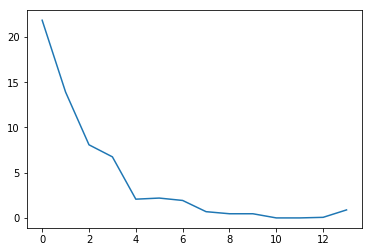


0.6133

run: logistic @ (400, 300, 200, 100)
CPU times: user 850 ms, sys: 2.45 s, total: 3.3 s
Wall time: 417 ms


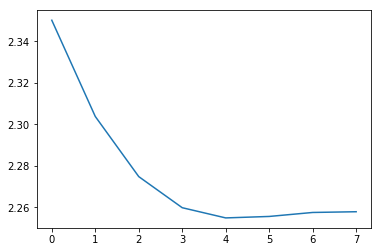


0.1135

run: tanh @ (400, 300, 200, 100)
CPU times: user 3.91 s, sys: 10.1 s, total: 14 s
Wall time: 1.76 s


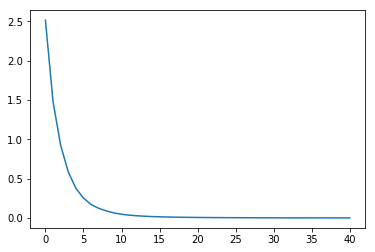


0.661

run: relu @ (400, 300, 200, 100)
CPU times: user 2.05 s, sys: 6.11 s, total: 8.17 s
Wall time: 1.03 s


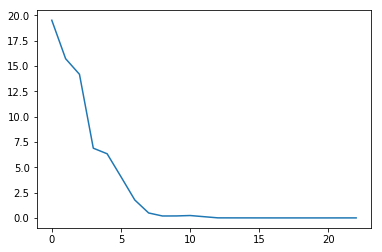


0.5989

run: identity @ (300, 225, 150, 75)
CPU times: user 815 ms, sys: 2.65 s, total: 3.46 s
Wall time: 433 ms


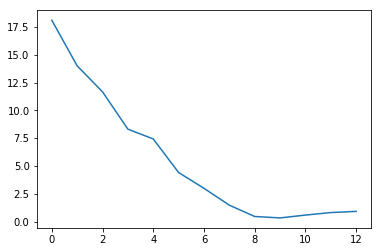


0.5645

run: logistic @ (300, 225, 150, 75)


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


CPU times: user 13.5 s, sys: 34.3 s, total: 47.9 s
Wall time: 5.77 s


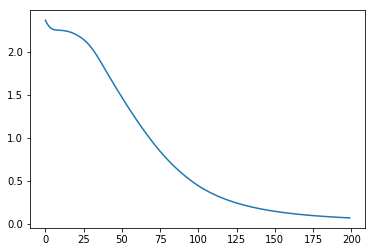


0.5894

run: tanh @ (300, 225, 150, 75)
CPU times: user 4.62 s, sys: 15.9 s, total: 20.5 s
Wall time: 2.56 s


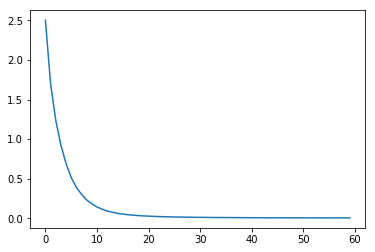


0.6375

run: relu @ (300, 225, 150, 75)
CPU times: user 964 ms, sys: 2.74 s, total: 3.71 s
Wall time: 464 ms


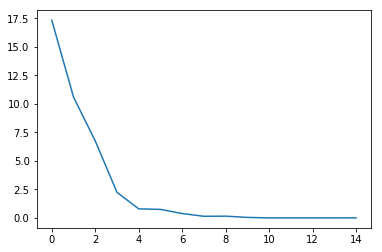


0.5509

run: identity @ (200, 150, 100, 50)
CPU times: user 1.05 s, sys: 2.95 s, total: 3.99 s
Wall time: 503 ms


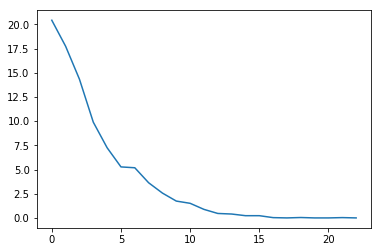


0.5876

run: logistic @ (200, 150, 100, 50)


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


CPU times: user 8.6 s, sys: 25.6 s, total: 34.2 s
Wall time: 3.92 s


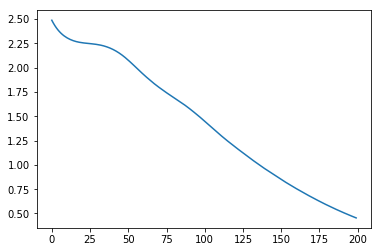


0.5237

run: tanh @ (200, 150, 100, 50)
CPU times: user 3.9 s, sys: 8.4 s, total: 12.3 s
Wall time: 1.51 s


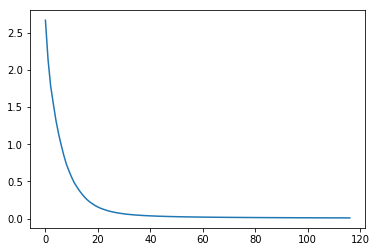


0.6279

run: relu @ (200, 150, 100, 50)
CPU times: user 910 ms, sys: 2.32 s, total: 3.23 s
Wall time: 440 ms


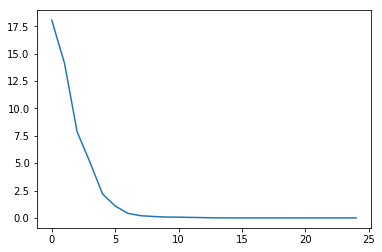


0.5082

run: identity @ (100, 75, 50, 25)
CPU times: user 313 ms, sys: 922 ms, total: 1.24 s
Wall time: 166 ms


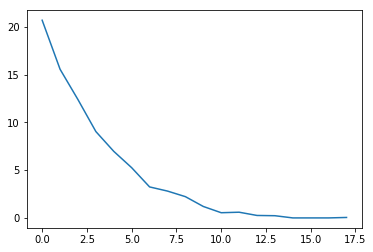


0.5756

run: logistic @ (100, 75, 50, 25)


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


CPU times: user 6.01 s, sys: 20.8 s, total: 26.8 s
Wall time: 3.38 s


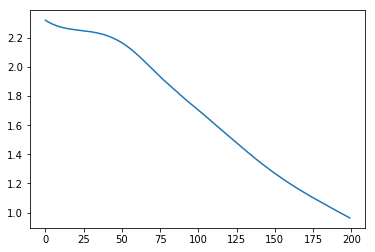


0.476

run: tanh @ (100, 75, 50, 25)


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


CPU times: user 6.49 s, sys: 22.8 s, total: 29.3 s
Wall time: 3.41 s


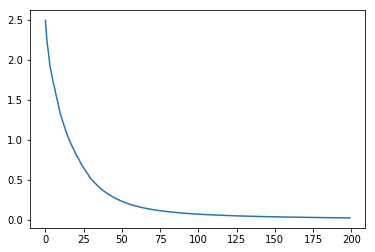


0.5653

run: relu @ (100, 75, 50, 25)
CPU times: user 2.26 s, sys: 8.7 s, total: 11 s
Wall time: 1.44 s


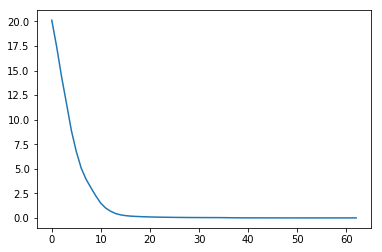


0.4245



In [31]:
accuracies_per_hlsf = {}
for hlsf in hlss:
    accuracies_per_hlsf[hlsf] = try_activations(factors, hlss[hlsf])

In [32]:
accuracies_per_hlsf

{'single': array([[0.4939, 0.6883, 0.6547, 0.6073],
        [0.6064, 0.6882, 0.646 , 0.6221],
        [0.5889, 0.682 , 0.6539, 0.6097],
        [0.5944, 0.6733, 0.638 , 0.5994],
        [0.6065, 0.681 , 0.6551, 0.6143],
        [0.589 , 0.6735, 0.6301, 0.6059],
        [0.5907, 0.6717, 0.6115, 0.6052],
        [0.5919, 0.6617, 0.6014, 0.5471]]),
 'double': array([[0.6245, 0.6862, 0.67  , 0.5324],
        [0.545 , 0.6874, 0.6769, 0.5782],
        [0.6134, 0.6851, 0.6771, 0.5005],
        [0.5779, 0.6783, 0.6665, 0.5897],
        [0.5996, 0.6872, 0.6773, 0.5818],
        [0.6091, 0.6786, 0.6489, 0.5713],
        [0.6077, 0.6703, 0.6308, 0.5506],
        [0.5908, 0.6793, 0.6084, 0.5028]]),
 'triple': array([[0.6321, 0.6643, 0.6325, 0.5287],
        [0.5891, 0.6655, 0.67  , 0.6048],
        [0.6092, 0.6665, 0.6587, 0.6413],
        [0.5936, 0.6779, 0.6818, 0.5218],
        [0.6332, 0.6715, 0.6616, 0.5699],
        [0.5919, 0.6563, 0.6553, 0.5234],
        [0.6335, 0.6604, 0.6597, 0.5499],


In [33]:
accuracies_list = [
    (hlsf, factors[factor], activations[activation], accuracies_per_hlsf[hlsf][factor][activation])
    for hlsf in hlss
    for factor in range(len(factors))
    for activation in range(len(activations))
]

In [34]:
accuracies = pd.DataFrame(accuracies_list, columns=['hlsf','factor','activation','accuracy'])

In [35]:
accuracies

,hlsf,factor,activation,accuracy
0,single,800,identity,0.4939
1,single,800,logistic,0.6883
2,single,800,tanh,0.6547
3,single,800,relu,0.6073
4,single,700,identity,0.6064
5,single,700,logistic,0.6882
6,single,700,tanh,0.6460
7,single,700,relu,0.6221
8,single,600,identity,0.5889
9,single,600,logistic,0.6820


In [36]:
accuracies.iloc[[accuracies['accuracy'].idxmax()]]

,hlsf,factor,activation,accuracy
1,single,800,logistic,0.6883


In [37]:
accuracies.to_csv('accuracies.csv')

In [38]:
accuracies.sort_values('accuracy', ascending=False)

,hlsf,factor,activation,accuracy
1,single,800,logistic,0.6883
5,single,700,logistic,0.6882
37,double,700,logistic,0.6874
49,double,400,logistic,0.6872
33,double,800,logistic,0.6862
41,double,600,logistic,0.6851
130,stairs,800,tanh,0.6850
9,single,600,logistic,0.6820
78,triple,500,tanh,0.6818
17,single,400,logistic,0.6810
